<a href="https://colab.research.google.com/github/hkaido0718/SupportRestriction/blob/main/Interference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interference
Let $Y_i$ be a binary outcome indicating whether individual $i$ smoked after the intervention. Let $z=(z_1,z_2)$ be a vector indicating the treatment status of individuals 1 and 2, and we let $Y_i(z)$ denote individual $i$'s potential outcome. $Y(z)=(Y_1(a),Y_2(z))$, where $Y_1(z)$ is the subject's outcome, whereas $Y_2(z)$ is the spouse's outcome. In the paper, we assume the exposure level

\begin{align}
D_i(z)=\begin{cases}
3& \text{ if }z_i=SIA\\
2& \text{ if }z_i=SIP\\
1& \text{ if }z_i=C, z_{-i}\in \{SIA,SIP\}\\
0& \text{ if }z_i=C,z_{-i}=C,
\end{cases}
\end{align}

determines the outcome. This allows us to define a potential outcome $\tilde Y_i(d)$ such that $\tilde Y_i(d)=Y_i(z)$ for any $z$ with $D_i(z)=d$. Consider testing the no-spillover assumption:
\begin{align}
D_i(z)=1,~ D_i(z')=0~\Rightarrow~Y_i(z)= Y_i(z').
\end{align}
 The no spillover effect restriction can also be expressed more succinctly as $\tilde Y_i(1)= \tilde Y_i(0), ~a.s.$ The following code builds a potential response graph based on $\tilde Y(\cdot)$.


In [2]:
!git clone https://github.com/hkaido0718/SupportRestriction.git

Cloning into 'SupportRestriction'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 3), reused 5 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 47.28 KiB | 23.64 MiB/s, done.
Resolving deltas: 100% (3/3), done.


The library has a function `GraphAnalyzer.build_graph_pairwise` which can build a graph from nodes, a function that describes when a pair of nodes (u,v) should NOT have an edge, and a function that extracts a group identity.

In [3]:
import networkx as nx
from SupportRestriction.graph_analysis_utils import GraphAnalyzer  # assuming you've saved the module

# Define nodes
nodes = [(y, d) for d in range(4) for y in (0, 1)]
print(nodes)

# Group function
group_fn = lambda node: node[1]  # group by d
print(group_fn(nodes[0])) # example of group ID

# A function that describes when the no spillover assumption is violated
def violates_nospillover(u, v):
    y1, d1 = u
    y2, d2 = v
    return ((d1 == 1 and d2 == 0) or (d1 == 0 and d2 == 1)) and y1 != y2
print(violates_nospillover(nodes[0], nodes[6]))

# Build G
G = GraphAnalyzer.build_graph_pairwise(nodes, violates_nospillover,group_fn)
print(G)

[(0, 0), (1, 0), (0, 1), (1, 1), (0, 2), (1, 2), (0, 3), (1, 3)]
0
False
Graph with 8 nodes and 22 edges


Let's analyze the potential response graph and visualize it.

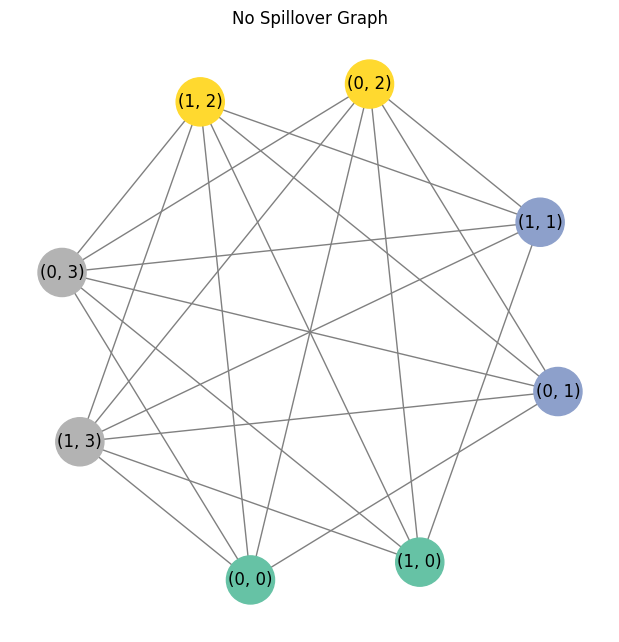

In [4]:
# Instantiate analyzer
analyzer = GraphAnalyzer(G, group_fn)

# Plot G
analyzer.plot_grouped_on_circle(title="No Spillover Graph", node_size=1200)


Now let's find all MISs.


In [5]:
# Instantiate analyzer
analyzer = GraphAnalyzer(G, group_fn)

# Show MIS
analyzer.print_mis_excluding_single_group()


Total MISs (excluding single-group ones): 2

1: [(0, 1), (1, 0)]
2: [(0, 0), (1, 1)]


The algorithm found two MISs:
- MIS1: $\{v_{(0,1)},v_{(1,0)}\}$
- MIS2: $\{v_{(0,0)},v_{(1,1)}\}$
implying
\begin{align}
P(Y_i=1\,|\,D_i=0,W_i)+P(Y_i=0\,|\,D_i=1,W_i)&\leqslant 1\\
P(Y_i=0\,|\,D_i=0,W_i)+P(Y_i=1\,|\,D_i=1,W_i)&\leqslant 1.
\end{align}
Now, let's check the regularity of the model.

In [6]:
# Check Regularity
print(analyzer.is_perfect())

for row in analyzer.enumerate_cliques_and_check(violates_nospillover):
    status = "✅" if row['satisfies_condition'] else "❌"
    print(f"{row['index']:>2}: {row['clique']} — {status}")

True
 1: [(0, 0), (0, 1), (0, 2), (0, 3)] — ✅
 2: [(0, 2), (0, 3), (1, 0), (1, 1)] — ✅
 3: [(0, 0), (0, 1), (0, 2), (1, 3)] — ✅
 4: [(0, 2), (1, 0), (1, 1), (1, 3)] — ✅
 5: [(0, 0), (0, 1), (0, 3), (1, 2)] — ✅
 6: [(0, 3), (1, 0), (1, 1), (1, 2)] — ✅
 7: [(0, 0), (0, 1), (1, 2), (1, 3)] — ✅
 8: [(1, 0), (1, 1), (1, 2), (1, 3)] — ✅


The code shows $G$ is perfect. Also, every maximal clique is a support point (i.e. satisfies the no spillover assumption). So, the model is regular. Hence, the aforementioned inequalities are sharp.

Now, we can do the same exercise for a weaker model that only imposes non-positive spillover effect:
\begin{align}
D_i(z)=1,~ D_i(z')=0~\Rightarrow~Y_i(z)\leqslant Y_i(z').
\end{align}
This requires us to write another function that describes when this restriction is violated. The rest is the same.

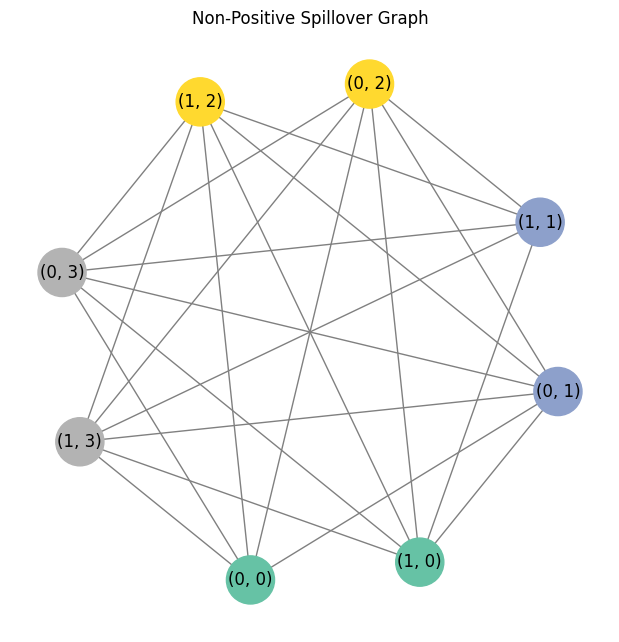

Total MISs (excluding single-group ones): 1

1: [(0, 0), (1, 1)]
True
 1: [(0, 1), (0, 2), (0, 3), (1, 0)] — ✅
 2: [(0, 1), (0, 2), (1, 0), (1, 3)] — ✅
 3: [(0, 0), (0, 1), (0, 2), (0, 3)] — ✅
 4: [(0, 0), (0, 1), (0, 2), (1, 3)] — ✅
 5: [(0, 1), (0, 3), (1, 0), (1, 2)] — ✅
 6: [(0, 1), (1, 0), (1, 2), (1, 3)] — ✅
 7: [(0, 0), (0, 1), (0, 3), (1, 2)] — ✅
 8: [(0, 0), (0, 1), (1, 2), (1, 3)] — ✅
 9: [(0, 2), (0, 3), (1, 0), (1, 1)] — ✅
10: [(0, 2), (1, 0), (1, 1), (1, 3)] — ✅
11: [(0, 3), (1, 0), (1, 1), (1, 2)] — ✅
12: [(1, 0), (1, 1), (1, 2), (1, 3)] — ✅


In [10]:

# Non-positive spillover
def violates_nonpos_spillover(u, v):
    y1, d1 = u
    y2, d2 = v
    return ((d1 == 1 and d2 == 0) and (y1 > y2)) or ((d1 == 0 and d2 == 1) and (y1 < y2))

# Build G using the same logic as used for clique checking
G_npos = GraphAnalyzer.build_graph_pairwise(nodes,violates_nonpos_spillover,group_fn)

# Instantiate analyzer
analyzer = GraphAnalyzer(G_npos, group_fn)
analyzer.plot_grouped_on_circle(title="Non-Positive Spillover Graph", node_size=1200)

# Obtain MIS
analyzer.print_mis_excluding_single_group()

# Check Regularity
print(analyzer.is_perfect())

for row in analyzer.enumerate_cliques_and_check(violates_nonpos_spillover):
    status = "✅" if row['satisfies_condition'] else "❌"
    print(f"{row['index']:>2}: {row['clique']} — {status}")

The algorithm found a single MIS:
- MIS: $\{v_{(0,0)},v_{(1,1)}\}$

implying
\begin{align}
P(Y_i=0\,|\,D_i=0,W_i)+P(Y_i=1\,|\,D_i=1,W_i)&\leqslant 1,
\end{align}
which issharp due to the regularity of the support restriction.